In [23]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 7)

from sklearn.metrics import mean_squared_error

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


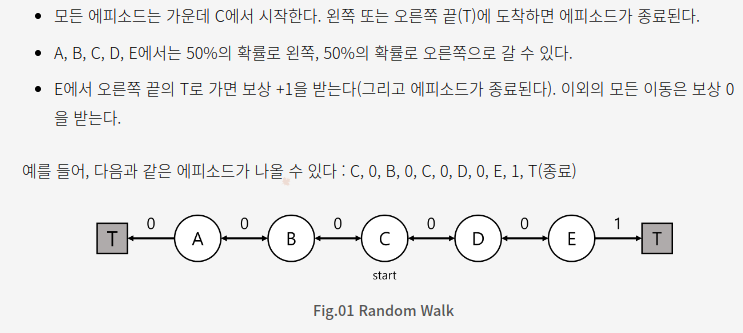



In [24]:
NUM_STATES = 5
STATES = np.arange(1, NUM_STATES + 1)
# STATE id happens to be the same as the true denormalized state value.

# Add 2 exit state, the state after exit actoin, whose state value will be 0
EXIT_STATES = [0, NUM_STATES + 1]
NUM_ALL_STATES = NUM_STATES + len(EXIT_STATES)

STARTING_STATE = (NUM_STATES + 1) / 2 + 1

#print(V_TRUE)
print('starting at State: {0}'.format(int(STARTING_STATE)))

starting at State: 4


In [25]:
def is_exit_state(state):
    return state in EXIT_STATES

def is_reward_exit_state(state):
    return state == EXIT_STATES[-1]

    # 입력 s0 출력 transition 
def take_action(s0):
    rand = np.random.random()
    if rand >= 0.5:
        s1 = s0 - 1
    else:
        s1 = s0 + 1
        
    if is_reward_exit_state(s1):
        reward = 1
    else:
        reward = 0
    return s1, reward
    
def init_v_func(num_all_states):
    """initialize value function"""
    v_func = np.zeros(NUM_ALL_STATES)
    # The value of EXIT_STATES should be 0
    return v_func

# Temporal Difference

[입력]

v_func: value 함수 (table)

s0: 시작위치

alpha: learning rate

gamma: discount factor


[출력]
v_func: update 된 value 함수

In [26]:
# HW1-1 아래 함수를 작성하세요

def run_td_episode(v_func, s0=STARTING_STATE, alpha=None, gamma=1.0):
    
    s = s0
    while (is_exit_state(s) == False) :
      s_, r = take_action(s)
      target = r + gamma * v_func[int(s_)]
      v_func[int(s)] += alpha * (target - v_func[int(s)])
      s = s_
  
    return v_func

working on 100000
Error:  1.88094819510849e-05


(0.0, 1.0)

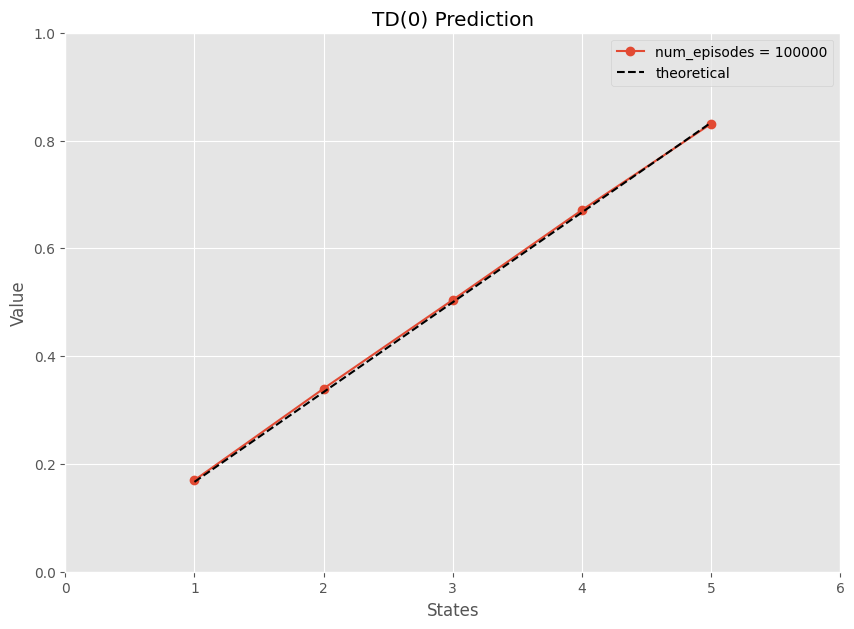

In [27]:
num_episodes=int(1e5)
alpha=1e-3
V_TRUE = np.array([1/6,2/6,3/6,4/6,5/6])

print('working on {0}'.format(num_episodes))
v_func = init_v_func(NUM_ALL_STATES)
for i in range(num_episodes):
    v_func = run_td_episode(v_func, alpha=alpha)

error=mean_squared_error(V_TRUE,v_func[1:-1])
print("Error: ",error)

# v_func[1:-1] no need to plot value of EXIT_STATES
plt.plot(range(1, NUM_STATES + 1), v_func[1:-1], 'o-', lw=1.5,
          label='num_episodes = {0}'.format(num_episodes))

# plot theorectical line
plt.title("TD(0) Prediction")
plt.plot(range(1, NUM_STATES + 1), V_TRUE, '--', color='black',
         label='theoretical')
plt.xlabel("States")
plt.ylabel("Value")

plt.legend(loc='best')
plt.xlim(0, NUM_STATES + 1)
plt.ylim(0, 1)

# Monte Carlo

[입력]

v_func: value 함수 (table)

num_epicode: episode 수

s0: 시작위치

gamma: discount factor


[출력]
v_func: update 된 value 함수


In [40]:
# HW1-2 아래 함수를 작성하세요

def run_mc_episode(v_func, num_episodes, s0=STARTING_STATE, gamma=1.0):

    s_v = np.zeros(7)
    n_v = np.zeros(7)
    
    for i in range(num_episodes) :
      states = []
      rewards = []
      s = s0
      states.append(s)
      rewards.append(0)

      while(is_exit_state(s) == False) :
        s_, r = take_action(s)
        s = s_
        states.append(s)
        rewards.append(r)
      
      states = reversed(states)
      rewards = reversed(rewards)
      iter = zip(states, rewards)
      cum_r = 0
      
      for s, r in iter:
        cum_r *= gamma 
        cum_r += r
        n_v[int(s)] += 1
        s_v[int(s)] += cum_r
    v_func = s_v / n_v
    
    return v_func

working on 100000
Error:  6.8943635993087835e-06


(0.0, 1.0)

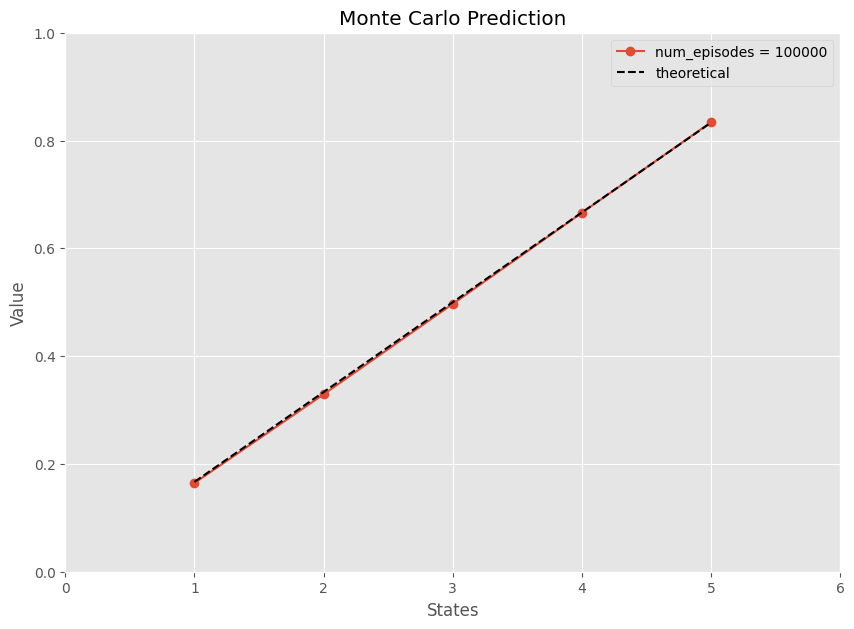

In [41]:
num_episodes=int(1e5)
V_TRUE = np.array([1/6,2/6,3/6,4/6,5/6])

print('working on {0}'.format(num_episodes))
v_func = init_v_func(NUM_ALL_STATES)
v_func = run_mc_episode(v_func, num_episodes)


error=mean_squared_error(V_TRUE,v_func[1:-1])
print("Error: ",error)


# v_func[1:-1] no need to plot value of EXIT_STATES
plt.plot(range(1, NUM_STATES + 1), v_func[1:-1], 'o-', lw=1.5,
          label='num_episodes = {0}'.format(num_episodes))

plt.title("Monte Carlo Prediction")
# plot theorectical line
plt.plot(range(1, NUM_STATES + 1), V_TRUE, '--', color='black',
         label='theoretical')
plt.xlabel("States")
plt.ylabel("Value")
plt.legend(loc='best')
plt.xlim(0, NUM_STATES + 1)
plt.ylim(0, 1)

# Incremental Monte Carlo

[입력]

v_func: value 함수 (table)

num_epicode: episode 수

s0: 시작위치

gamma: discount factor

alpha: learning rate

[출력]

v_func: update 된 value 함수

In [42]:
# HW1-3 아래 함수를 작성하세요

def run_incre_mc_episode(v_func,num_episodes, s0=STARTING_STATE, gamma=1.0,alpha=None):
    
    for i in range(num_episodes) :
      states = []
      rewards = []
      s = s0
      states.append(s)
      rewards.append(0)

      while(is_exit_state(s) == False) :
        s_, r = take_action(s)
        s = s_
        states.append(s)
        rewards.append(r)
      
      states = reversed(states)
      rewards = reversed(rewards)
      iter = zip(states, rewards)
      cum_r = 0
      
      for s, r in iter:
        cum_r *= gamma 
        cum_r += r
        
        v_func[int(s)] += alpha * (cum_r - v_func[int(s)])

    return v_func

working on 100000
Error:  2.219049412683124e-05


(0.0, 1.0)

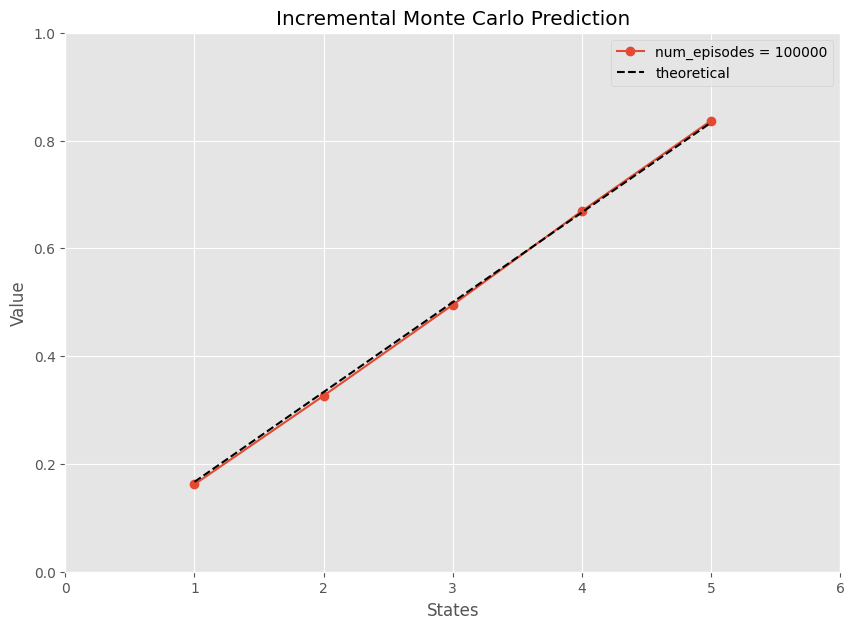

In [43]:
num_episodes=int(1e5)
alpha=1e-4
V_TRUE = np.array([1/6,2/6,3/6,4/6,5/6])


print('working on {0}'.format(num_episodes))
v_func = init_v_func(NUM_ALL_STATES)
v_func = run_incre_mc_episode(v_func,num_episodes,alpha=alpha)



error=mean_squared_error(V_TRUE,v_func[1:-1])
print("Error: ",error)

# v_func[1:-1] no need to plot value of EXIT_STATES
plt.plot(range(1, NUM_STATES + 1), v_func[1:-1], 'o-', lw=1.5,
          label='num_episodes = {0}'.format(num_episodes))

# plot theorectical line
plt.title("Incremental Monte Carlo Prediction")
plt.plot(range(1, NUM_STATES + 1), V_TRUE, '--', color='black',
         label='theoretical')
plt.xlabel("States")
plt.ylabel("Value")

plt.legend(loc='best')
plt.xlim(0, NUM_STATES + 1)
plt.ylim(0, 1)